In [17]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

The idea of PLSR is to reduce the dimensionality of features involved in a model. If there are too many features, then there can be extra noise in the model caused by the unrelated variance in the expected result. Also, if features are unrelated to the expected result then we also crate noise prediction, especially if features share variance through multicollinearity. The goal then is to predict Y from the original feature space of X and try to create a reduced list of features called R(X) that is very close to the expected value of Y. Similar to PCA, except instead of tryng to reduce the set of features to a smaller number in order to explain the same variance in the features, we reduce the feature number to explain the same variance from the original list for the expected result.

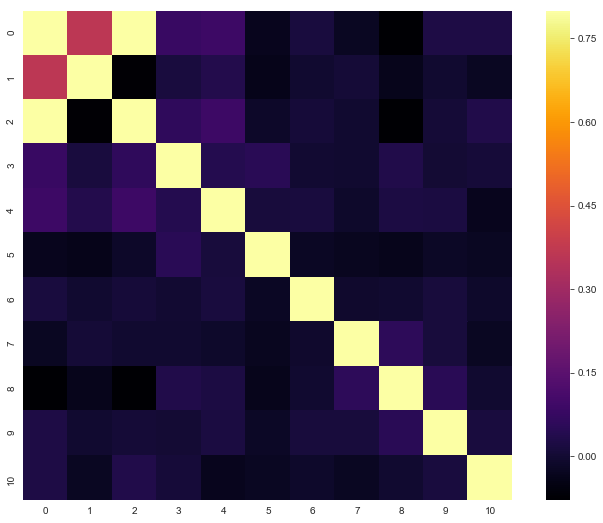

In [8]:
#number of deatapoints
n = 1000
#number of features
p = 10

#create normally distributed data for parameters
X = np.random.normal(size=n*p).reshape((n,p))

#create normally distributed data for outcome, but with noise added
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n*1)+5

f, ax = plt.subplots(figsize=(12,9))
corr_mat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

#draw heatmap
sns.heatmap(corr_mat, vmax=.8, square=True, cmap='inferno')
plt.show()

R-squared regression: 0.8378474488957677
R-squared regression: 0.837847096760388


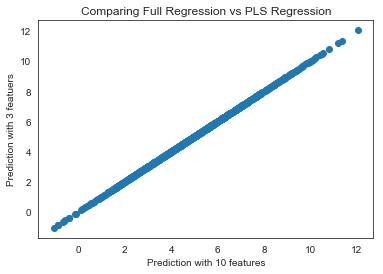

In [14]:
#fitting model with all 10 features
regr = linear_model.LinearRegression()
regr.fit(X, y)

y_pred = regr.predict(X)
print("R-squared regression: {}".format(regr.score(X, y)))

#fit a model using PLSR and reduce dimensionality to 3
pls1 = PLSRegression(n_components=3)

pls1.fit(X, y)

y_pls_pred = pls1.predict(X)
print("R-squared regression: {}".format(pls1.score(X, y)))

#comparing results
plt.scatter(y_pred, y_pls_pred)
plt.title("Comparing Full Regression vs PLS Regression")
plt.xlabel("Prediction with 10 features")
plt.ylabel("Prediction with 3 featuers")
plt.show()

PLSR does not work as well with the features are uncorrelated or if the only feature correlations are in pairs (feature 1 only correlated with feature 2, feature 3 only correlated with feature 4, etc ...)

R-squared: 0.8378474488957677


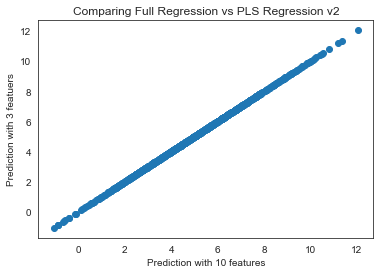

In [16]:
pls2 = PLSRegression(n_components=7)
pls2.fit(X, y)
print("R-squared: {}".format(pls2.score(X, y)))

y_pls2_pred = pls2.predict(X)

plt.scatter(y_pred, y_pls2_pred)
plt.title("Comparing Full Regression vs PLS Regression v2")
plt.xlabel("Prediction with 10 features")
plt.ylabel("Prediction with 3 featuers")
plt.show()

In [18]:
#Full regression
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=30)
print("20% holdout score: {}".format(regr.fit(xtrain, ytrain).score(xtest, ytest)))
print("Full sample score: {}".format(regr.fit(X, y).score(X, y)))

20% holdout score: 0.8551673608092512
Full sample score: 0.8378474488957677


In [20]:
#cross validation
cross_val_score(regr, X, y, cv=10)

array([0.8640983 , 0.81460964, 0.79228661, 0.80385983, 0.82663993,
       0.79543444, 0.83796576, 0.85163609, 0.8369108 , 0.83775637])

In [19]:
#PLS regression
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=30)
print("20% holdout score: {}".format(pls1.fit(x_train, y_train).score(x_test, y_test)))
print("Full sample score: {}".format(pls1.fit(X, y).score(X, y)))

20% holdout score: 0.8552096204715172
Full sample score: 0.837847096760388


In [21]:
cross_val_score(pls1, X, y, cv=10)

array([0.86406144, 0.8146566 , 0.79207073, 0.8038036 , 0.82672146,
       0.79531799, 0.83797052, 0.85165758, 0.83699307, 0.83780462])

In [22]:
#PLS v2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=30)
print("20% holdout score: {}".format(pls2.fit(x_train, y_train).score(x_test, y_test)))
print("Full sample score: {}".format(pls2.fit(X, y).score(X, y)))

20% holdout score: 0.8551673605985879
Full sample score: 0.8378474488957677


In [23]:
cross_val_score(pls2, X, y, cv=10)

array([0.8640983 , 0.81460964, 0.79228661, 0.80385983, 0.82663993,
       0.79543444, 0.83796575, 0.85163609, 0.8369108 , 0.83775637])